# Extracting data for displaying it with D3

### Exercise 1

In [1]:
import pandas as pd

filename = "SFPD_Incidents_-_from_1_January_2003.csv"

def readfile(filename):
    
    data = pd.read_csv(filename)
    return data

data = readfile(filename)

In [2]:
#extract year from date column in the CSV file and only keep them from 2003 to 2015 (full years in the database)
def filteryears(dataset):
    
    #Create a new column with the extracted years from the date column in the CSV file
    dataset['Year'] = [int(date.split("/")[-1]) for date in dataset['Date']]
    #filter the dataset. Just keep the rows that do not belong to year 2016.
    dataset = dataset[dataset['Year'] != 2016]

    return dataset

data = filteryears(data)

In [3]:
years=list(set(data['Year']))
years = [years[0], years[-1]]
years

[2003, 2015]

In [4]:
#each point should correspond to a district

#x axis should correspond to the total number of prostitution incidents.
data_pros = data[data['Category'] == 'PROSTITUTION']
districts = list(data_pros['PdDistrict'])
un_districts = list(set(districts))

#get number of incidents of Prostitution per district
dic_year_pros = {}
dic_pros = {}
for year in years:
    dt = data_pros[data_pros['Year'] == year]
    dic_pros = {}
    for district in un_districts:
        df = dt[dt['PdDistrict'] == district]
        dic_pros[district] = df.shape[0]
    dic_year_pros[year] = dic_pros

In [5]:
#each point should correspond to a district

#x axis should correspond to the total number of prostitution incidents.
data_vehic = data[data['Category'] == 'VEHICLE THEFT']
districts = list(data_pros['PdDistrict'])
un_districts = list(set(districts))

#get number of incidents of Prostitution per district
dic_year_vehic = {}
for year in years:
    dt = data_vehic[data_vehic['Year'] == year]
    dic_vehic = {}
    for district in un_districts:
        df = dt[dt['PdDistrict'] == district]
        dic_vehic[district] = df.shape[0]
    dic_year_vehic[year] = dic_vehic

In [6]:
#write data to a csv file in proper format
##headers:
#district; prostitution03; vtheft03; totalNumber03;  prostitution15; vtheft15; totalNumber15;
import pandas as pd

df = pd.DataFrame()
df['district'] = dic_year_pros[2003].keys()
df['prostitution03'] = [val for key, val in dic_year_pros[2003].iteritems()]
df['vtheft03'] = [val for key, val in dic_year_vehic[2003].iteritems()]
df['totalNumber03'] = [df['prostitution03'].iloc[i] + df['vtheft03'].iloc[i] for i in range(df.shape[0])]
df['prostitution15'] = [val for key, val in dic_year_pros[2015].iteritems()]
df['vtheft15'] = [val for key, val in dic_year_vehic[2015].iteritems()]
df['totalNumber15'] = [df['prostitution15'].iloc[i] + df['vtheft15'].iloc[i] for i in range(df.shape[0])]
df

,district,prostitution03,vtheft03,totalNumber03,prostitution15,vtheft15,totalNumber15
0,CENTRAL,70,1193,1263,44,549,593
1,NORTHERN,581,1879,2460,42,942,984
2,INGLESIDE,5,2319,2324,4,1366,1370
3,SOUTHERN,18,1426,1444,96,793,889
4,MISSION,713,2063,2776,66,1195,1261
5,TENDERLOIN,527,371,898,23,112,135
6,RICHMOND,15,1081,1096,9,561,570
7,TARAVAL,10,1665,1675,78,786,864
8,BAYVIEW,11,2121,2132,6,981,987
9,PARK,2,1207,1209,1,639,640


In [7]:
#write data to csv file
#df.to_csv('SF_data.csv', sep=',', header=True)

### Exercise 2 

In [8]:
focuscrimes = set(['PROSTITUTION','VEHICLE THEFT','WEAPON LAWS'])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot histogram
def barplot(series, title, figsize, ylabel, flag, rotation):
    #plot hist
    ax = series.plot(kind='bar', 
                title = title,
                figsize = figsize,
                fontsize = 13)
    
    #set ylabel
    ax.set_ylabel(ylabel)
    #set xlabel (depending on the flag that comes as a function parameter)
    ax.get_xaxis().set_visible(flag)
    #set series index as xlabels and rotate them
    ax.set_xticklabels(series.index, rotation= rotation)

incidents = []

def year_by_year_subcat(db_15, focuscrimes):
    
    index = 1
    for crime in focuscrimes:
        #filter table by type of crime
        db = db_15[db_15['Category'] == crime]
        #get year counts of that crime
        year_counts = db['Year'].value_counts()
        #sort it (from 2003 to 2015)
        print crime
        year_counts = year_counts.sort_index()
        incidents.append(year_counts.values)
        #plot it
        plt.subplot(7,2,index)
        barplot(year_counts, crime, figsize=(20,35), ylabel = 'crime count', flag = True, rotation = 0)
        index += 1
        
    return incidents

WEAPON LAWS
VEHICLE THEFT
PROSTITUTION


[array([1281, 1252, 1341, 1324, 1318, 1419, 1433, 1349, 1329, 1460, 1536,
        1581, 1643]),
 array([15325, 17884, 18194,  7291,  6460,  6053,  5183,  4346,  4762,
         6183,  6241,  7113,  7924]),
 array([1952, 1527, 1103, 1290, 1873, 1673, 1468, 1299, 1094,  690,  692,
         449,  369])]

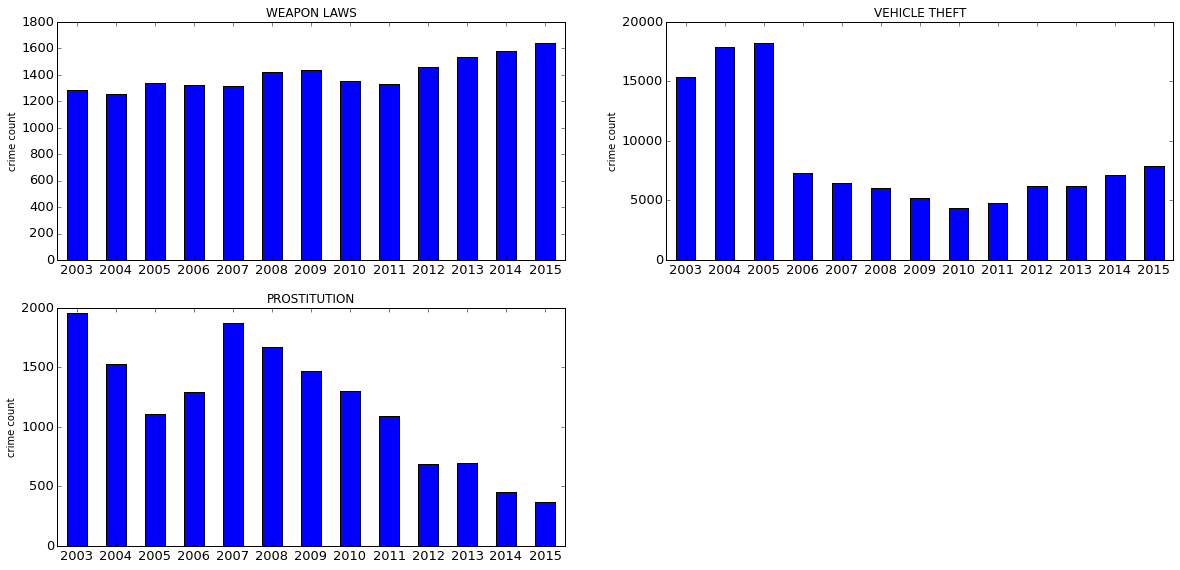

In [10]:
year_by_year_subcat(data, focuscrimes)

In [11]:
weapon_incidents = list(incidents[0])
vehic_incidents = list(incidents[1])
prost_incidents = list(incidents[2])

df = pd.DataFrame()
df['vtheft03_15'] = vehic_incidents
df['prost03_15'] = prost_incidents
df['weapons03_15'] = weapon_incidents

In [12]:
#write data to csv file
df.to_csv('SF_hist.csv', sep=',', header=True)

In [13]:
df

,vtheft03_15,prost03_15,weapons03_15
0,15325,1952,1281
1,17884,1527,1252
2,18194,1103,1341
3,7291,1290,1324
4,6460,1873,1318
5,6053,1673,1419
6,5183,1468,1433
7,4346,1299,1349
8,4762,1094,1329
9,6183,690,1460
